In [7]:
# Theil-Senn estimator 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk
import statsmodels.api as sm
import pandas as pd

In [2]:
x = np.linspace(-5, 5, num=150)

y = x + np.random.normal(size=x.size)

y[11:15] += 10  # add outliers

y[-5:] -= 7

In [3]:
res = stats.theilslopes(y, x, 0.90, method='separate')

lsq_res = stats.linregress(x, y)

In [4]:
res

TheilslopesResult(slope=0.9740753651154497, intercept=-0.023892354230660863, low_slope=0.9051978854417458, high_slope=1.0341596154747854)

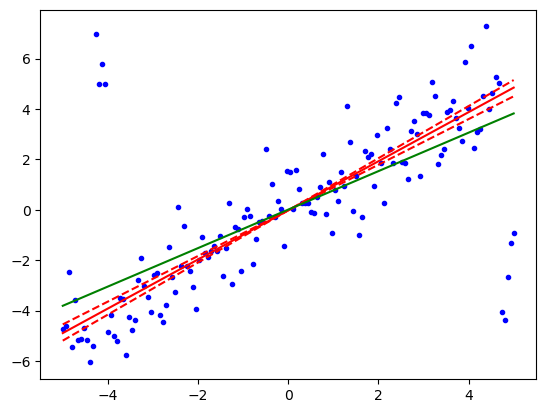

In [5]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(x, y, 'b.')

ax.plot(x, res[1] + res[0] * x, 'r-')

ax.plot(x, res[1] + res[2] * x, 'r--')

ax.plot(x, res[1] + res[3] * x, 'r--')

ax.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-')

plt.show()

In [8]:
# read all datasets
Birth_data = pd.read_csv("../daily-total-female-births.csv",parse_dates=['Date'],index_col='Date')
Shampoo_data = pd.read_csv("../shampoo.csv",parse_dates=['Month'],index_col='Month')
Passenger_data = pd.read_csv("../AirPassengers.csv",parse_dates=['Month'],index_col='Month')

/tmp/ipykernel_4967/2886928217.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Shampoo_data = pd.read_csv("../shampoo.csv",parse_dates=['Month'],index_col='Month')


In [9]:
Birth_data_holes = pd.read_csv("../daily-total-female-births_holes.csv",parse_dates=['Date'],index_col='Date')

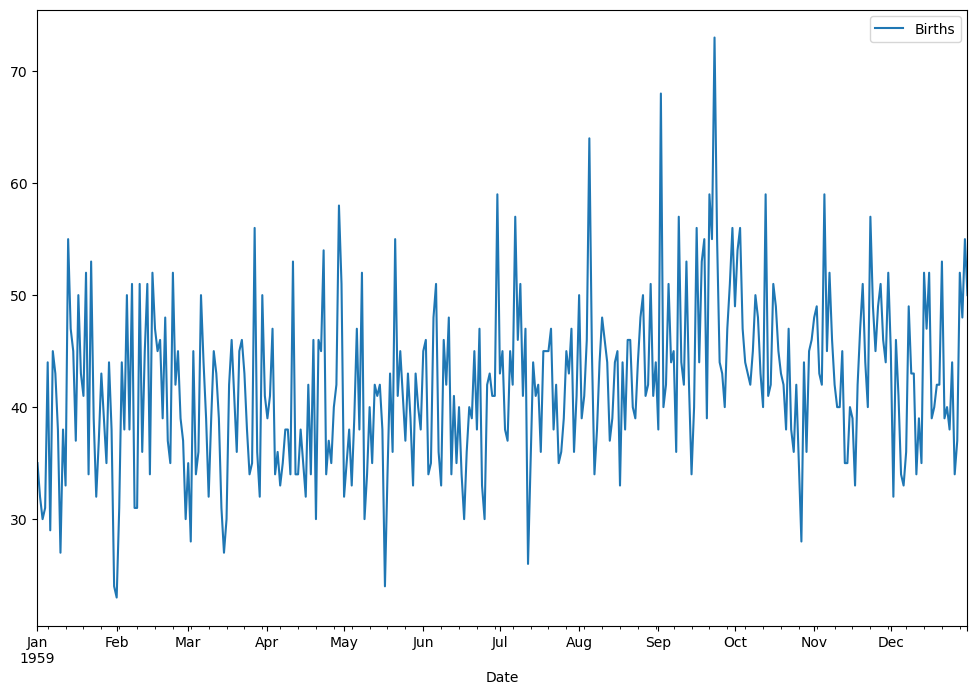

In [10]:
Birth_data.plot(figsize=(12,8));

In [11]:
Birth_data

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [12]:
Birth_data.Births.values

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

In [13]:
Birth_data.index.values

array(['1959-01-01T00:00:00.000000000', '1959-01-02T00:00:00.000000000',
       '1959-01-03T00:00:00.000000000', '1959-01-04T00:00:00.000000000',
       '1959-01-05T00:00:00.000000000', '1959-01-06T00:00:00.000000000',
       '1959-01-07T00:00:00.000000000', '1959-01-08T00:00:00.000000000',
       '1959-01-09T00:00:00.000000000', '1959-01-10T00:00:00.000000000',
       '1959-01-11T00:00:00.000000000', '1959-01-12T00:00:00.000000000',
       '1959-01-13T00:00:00.000000000', '1959-01-14T00:00:00.000000000',
       '1959-01-15T00:00:00.000000000', '1959-01-16T00:00:00.000000000',
       '1959-01-17T00:00:00.000000000', '1959-01-18T00:00:00.000000000',
       '1959-01-19T00:00:00.000000000', '1959-01-20T00:00:00.000000000',
       '1959-01-21T00:00:00.000000000', '1959-01-22T00:00:00.000000000',
       '1959-01-23T00:00:00.000000000', '1959-01-24T00:00:00.000000000',
       '1959-01-25T00:00:00.000000000', '1959-01-26T00:00:00.000000000',
       '1959-01-27T00:00:00.000000000', '1959-01-28

In [34]:
time = pd.to_datetime(Birth_data.index)

year = time.year
start_of_year = pd.to_datetime(year.astype(str) + "-01-01")
start_of_next = pd.to_datetime((year + 1).astype(str) + "-01-01")

time_frac = year + (time - start_of_year) / (start_of_next - start_of_year)

In [62]:
time_frac = time_frac -1959

In [63]:
time_frac

Index([                 0.0, 0.002739726027357392, 0.005479452054714784,
        0.00821917808229955, 0.010958904109656942, 0.013698630137014334,
       0.016438356164371726, 0.019178082191729118,  0.02191780821908651,
       0.024657534246671275,
       ...
         0.9726027397259713,   0.9753424657533287,   0.9780821917809135,
         0.9808219178082709,   0.9835616438356283,   0.9863013698629857,
         0.9890410958903431,   0.9917808219177005,   0.9945205479452852,
         0.9972602739726426],
      dtype='float64', name='Date', length=365)

In [17]:
r_scipy_2 = stats.theilslopes(Birth_data.Births.values,x=None, alpha=0.90, method='separate')

In [72]:
r_scipy_2[0]

0.019230769230769232

In [83]:
0.0192307 * 360 * 10

69.23052

In [76]:
45-38

7

In [ ]:
7/360  #(v/h)

0.019444444444444445

In [75]:
r_scipy_2 [1] + r_scipy_2 [0] * 359

45.40384615384615

In [64]:
r_scipy = stats.theilslopes(Birth_data.Births.values,x=time_frac.values, alpha=0.90, method='separate')

In [80]:
r_scipy [1] + r_scipy [0] * 0

38.499999999999204

In [69]:
r_scipy[0]

7.019230769232089

In [21]:
x = np.arange(len(Birth_data.Births.values))

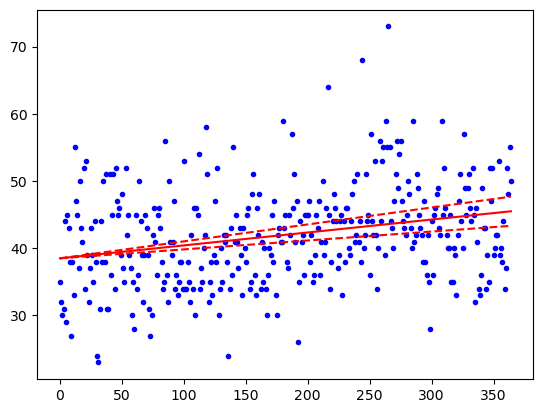

In [41]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(x, Birth_data, 'b.')

ax.plot(x, r_scipy_2 [1] + r_scipy_2 [0] * x, 'r-')

ax.plot(x, r_scipy_2 [1] + r_scipy_2 [2] * x, 'r--')

ax.plot(x, r_scipy_2 [1] + r_scipy_2 [3] * x, 'r--')

#ax.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-')

plt.show()

In [52]:
time_frac.values

array([1959.        , 1959.00273973, 1959.00547945, 1959.00821918,
       1959.0109589 , 1959.01369863, 1959.01643836, 1959.01917808,
       1959.02191781, 1959.02465753, 1959.02739726, 1959.03013699,
       1959.03287671, 1959.03561644, 1959.03835616, 1959.04109589,
       1959.04383562, 1959.04657534, 1959.04931507, 1959.05205479,
       1959.05479452, 1959.05753425, 1959.06027397, 1959.0630137 ,
       1959.06575342, 1959.06849315, 1959.07123288, 1959.0739726 ,
       1959.07671233, 1959.07945205, 1959.08219178, 1959.08493151,
       1959.08767123, 1959.09041096, 1959.09315068, 1959.09589041,
       1959.09863014, 1959.10136986, 1959.10410959, 1959.10684932,
       1959.10958904, 1959.11232877, 1959.11506849, 1959.11780822,
       1959.12054795, 1959.12328767, 1959.1260274 , 1959.12876712,
       1959.13150685, 1959.13424658, 1959.1369863 , 1959.13972603,
       1959.14246575, 1959.14520548, 1959.14794521, 1959.15068493,
       1959.15342466, 1959.15616438, 1959.15890411, 1959.16164

In [71]:
r_scipy [1] + r_scipy [2] * time_frac.values

array([38.5       , 38.51327434, 38.52654867, 38.53982301, 38.55309735,
       38.56637168, 38.57964602, 38.59292035, 38.60619469, 38.61946903,
       38.63274336, 38.6460177 , 38.65929204, 38.67256637, 38.68584071,
       38.69911504, 38.71238938, 38.72566372, 38.73893805, 38.75221239,
       38.76548673, 38.77876106, 38.7920354 , 38.80530973, 38.81858407,
       38.83185841, 38.84513274, 38.85840708, 38.87168142, 38.88495575,
       38.89823009, 38.91150442, 38.92477876, 38.9380531 , 38.95132743,
       38.96460177, 38.97787611, 38.99115044, 39.00442478, 39.01769912,
       39.03097345, 39.04424779, 39.05752212, 39.07079646, 39.0840708 ,
       39.09734513, 39.11061947, 39.12389381, 39.13716814, 39.15044248,
       39.16371681, 39.17699115, 39.19026549, 39.20353982, 39.21681416,
       39.2300885 , 39.24336283, 39.25663717, 39.2699115 , 39.28318584,
       39.29646018, 39.30973451, 39.32300885, 39.33628319, 39.34955752,
       39.36283186, 39.37610619, 39.38938053, 39.40265487, 39.41

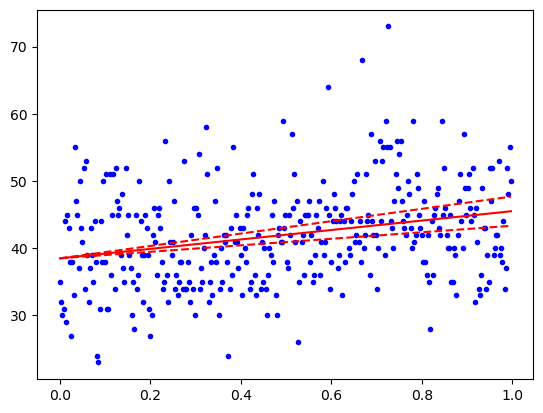

In [66]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(time_frac.values, Birth_data, 'b.')

ax.plot(time_frac.values, r_scipy [1] + r_scipy [0] * time_frac.values, 'r-')

ax.plot(time_frac.values, r_scipy [1] + r_scipy [2] * time_frac.values, 'r--')

ax.plot(time_frac.values, r_scipy [1] + r_scipy [3] * time_frac.values, 'r--')

#ax.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-')

plt.show()

In [24]:
7.019230769232089/0.019417475728155338

361.4903846154526

In [25]:
mk.original_test(Birth_data_holes, alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=8.918430349780238e-08, z=5.347486008188541, Tau=0.1885948622717425, s=12187.0, var_s=5193056.333333333, slope=0.019417475728155338, intercept=38.41747572815534)

In [26]:
mk.original_test(Birth_data, alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=1.144585319856617e-07, z=5.302131199455321, Tau=0.18569923227457474, s=12336.0, var_s=5412244.0, slope=0.019230769230769232, intercept=38.5)

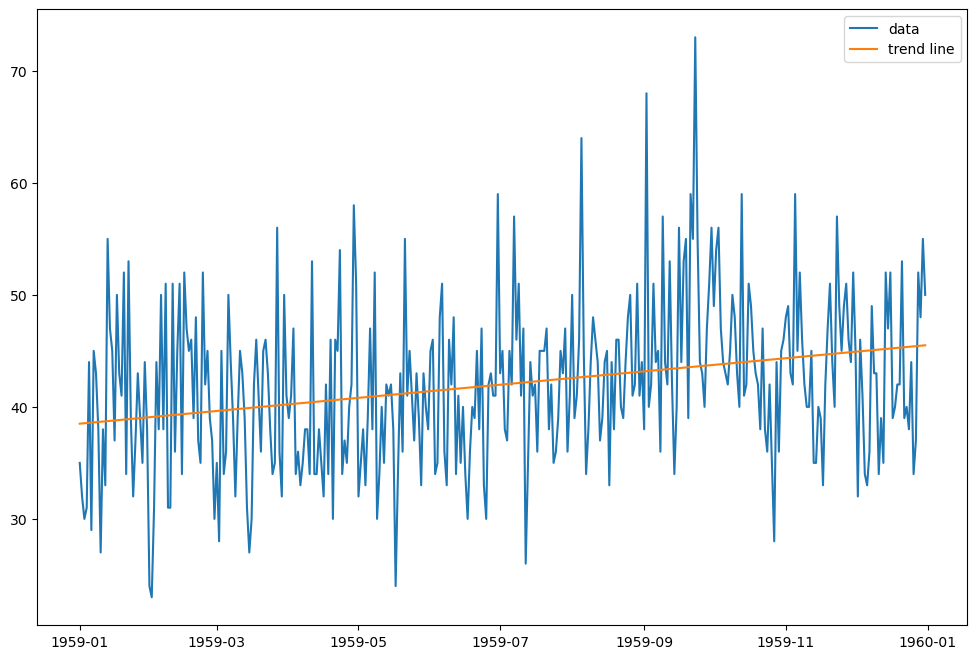

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(Birth_data, alpha=0.05)
trend_line = np.arange(len(Birth_data)) * res.slope + res.intercept

ax.plot(Birth_data)
ax.plot(Birth_data.index, trend_line)
ax.legend(['data', 'trend line'])

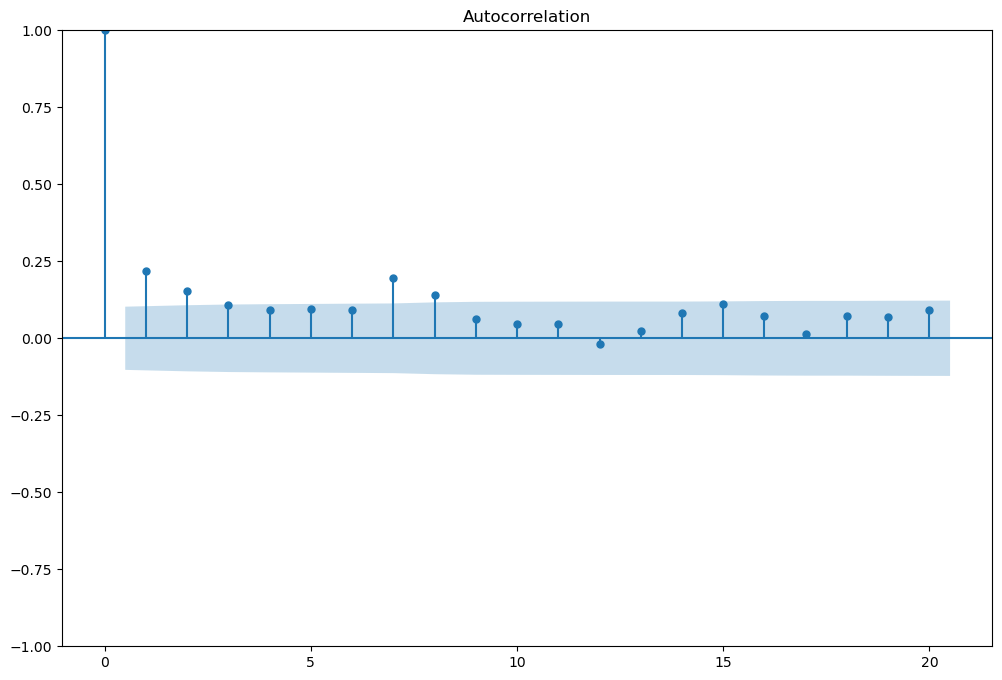

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(Birth_data, lags=20, ax=ax);

In [29]:
mk.original_test(Birth_data, alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=1.144585319856617e-07, z=5.302131199455321, Tau=0.18569923227457474, s=12336.0, var_s=5412244.0, slope=0.019230769230769232, intercept=38.5)

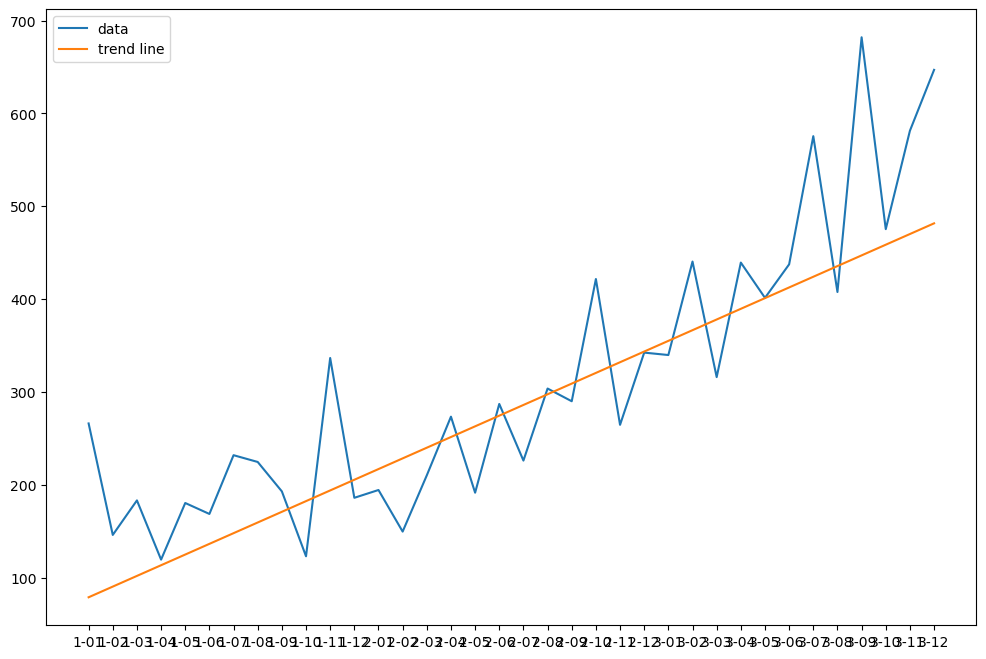

In [30]:
data = Shampoo_data

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(data)
trend_line = np.arange(len(data)) * res.slope + res.intercept

ax.plot(data)
ax.plot(data.index, trend_line)
ax.legend(['data', 'trend line'])

In [84]:

# trials with AVHRR data
times = [1981.57534247, 1981.60273973, 1981.63013699, 1981.65753425,
       1981.68493151, 1981.71232877, 1981.73972603, 1981.76712329,
       1981.79452055, 1981.82191781, 1981.84931507, 1981.87671233,
       1981.90410959, 1981.93150685, 1981.95890411, 1981.98630137,
       1982.        , 1982.02739726, 1982.05479452, 1982.08219178,
       1982.10958904, 1982.1369863 , 1982.16438356, 1982.19178082,
       1982.21917808, 1982.24657534, 1982.2739726 , 1982.30136986,
       1982.32876712, 1982.35616438, 1982.38356164, 1982.4109589 ,
       1982.43835616, 1982.46575342, 1982.49315068, 1982.52054795,
       1982.54794521, 1982.57534247, 1982.60273973, 1982.63013699,
       1982.65753425, 1982.68493151, 1982.71232877, 1982.73972603,
       1982.76712329, 1982.79452055, 1982.82191781, 1982.84931507,
       1982.87671233, 1982.90410959, 1982.93150685, 1982.95890411,
       1982.98630137, 1983.        , 1983.02739726, 1983.05479452,
       1983.08219178, 1983.10958904, 1983.1369863 , 1983.16438356,
       1983.19178082, 1983.21917808, 1983.24657534, 1983.2739726 ,
       1983.30136986, 1983.32876712, 1983.35616438, 1983.38356164,
       1983.4109589 , 1983.43835616, 1983.46575342, 1983.49315068,
       1983.52054795, 1983.54794521, 1983.57534247, 1983.60273973,
       1983.63013699, 1983.65753425, 1983.68493151, 1983.71232877,
       1983.73972603, 1983.76712329, 1983.79452055, 1983.82191781,
       1983.84931507, 1983.87671233, 1983.90410959, 1983.93150685,
       1983.95890411, 1983.98630137, 1984.        , 1984.02739726,
       1984.05479452, 1984.08219178, 1984.10958904, 1984.1369863 ,
       1984.16438356, 1984.19178082, 1984.21917808, 1984.24657534,
       1984.2739726 , 1984.30136986, 1984.32876712, 1984.35616438,
       1984.38356164, 1984.4109589 , 1984.43835616, 1984.46575342,
       1984.49315068, 1984.52054795, 1984.54794521, 1984.57534247,
       1984.60273973, 1984.63013699, 1984.65753425, 1984.68493151,
       1984.71232877, 1984.73972603, 1984.76712329, 1984.79452055,
       1984.82191781, 1984.84931507, 1984.87671233, 1984.90410959,
       1984.93150685, 1984.95890411, 1984.98630137, 1985.        ,
       1985.02739726, 1985.05479452, 1985.08219178, 1985.10958904,
       1985.1369863 , 1985.16438356, 1985.19178082, 1985.21917808,
       1985.24657534, 1985.2739726 , 1985.30136986, 1985.32876712,
       1985.35616438, 1985.38356164, 1985.4109589 , 1985.43835616,
       1985.46575342, 1985.49315068, 1985.52054795, 1985.54794521,
       1985.57534247, 1985.60273973, 1985.63013699, 1985.65753425,
       1985.68493151, 1985.71232877, 1985.73972603, 1985.76712329,
       1985.79452055, 1985.82191781, 1985.84931507, 1985.87671233,
       1985.90410959, 1985.93150685, 1985.95890411, 1985.98630137,
       1986.        , 1986.02739726, 1986.05479452, 1986.08219178,
       1986.10958904, 1986.1369863 , 1986.16438356, 1986.19178082,
       1986.21917808, 1986.24657534, 1986.2739726 , 1986.30136986,
       1986.32876712, 1986.35616438, 1986.38356164, 1986.4109589 ,
       1986.43835616, 1986.46575342, 1986.49315068, 1986.52054795,
       1986.54794521, 1986.57534247, 1986.60273973, 1986.63013699,
       1986.65753425, 1986.68493151, 1986.71232877, 1986.73972603,
       1986.76712329, 1986.79452055, 1986.82191781, 1986.84931507,
       1986.87671233, 1986.90410959, 1986.93150685, 1986.95890411,
       1986.98630137, 1987.        , 1987.02739726, 1987.05479452,
       1987.08219178, 1987.10958904, 1987.1369863 , 1987.16438356,
       1987.19178082, 1987.21917808, 1987.24657534, 1987.2739726 ,
       1987.30136986, 1987.32876712, 1987.35616438, 1987.38356164,
       1987.4109589 , 1987.43835616, 1987.46575342, 1987.49315068,
       1987.52054795, 1987.54794521, 1987.57534247, 1987.60273973,
       1987.63013699, 1987.65753425, 1987.68493151, 1987.71232877,
       1987.73972603, 1987.76712329, 1987.79452055, 1987.82191781,
       1987.84931507, 1987.87671233, 1987.90410959, 1987.93150685,
       1987.95890411, 1987.98630137, 1988.        , 1988.02739726,
       1988.05479452, 1988.08219178, 1988.10958904, 1988.1369863 ,
       1988.16438356, 1988.19178082, 1988.21917808, 1988.24657534,
       1988.2739726 , 1988.30136986, 1988.32876712, 1988.35616438,
       1988.38356164, 1988.4109589 , 1988.43835616, 1988.46575342,
       1988.49315068, 1988.52054795, 1988.54794521, 1988.57534247,
       1988.60273973, 1988.63013699, 1988.65753425, 1988.68493151,
       1988.71232877, 1988.73972603, 1988.76712329, 1988.79452055,
       1988.82191781, 1988.84931507, 1988.87671233, 1988.90410959,
       1989.        , 1989.02739726, 1989.05479452, 1989.08219178,
       1989.10958904, 1989.1369863 , 1989.16438356, 1989.19178082,
       1989.21917808, 1989.24657534, 1989.2739726 , 1989.30136986,
       1989.32876712, 1989.35616438, 1989.38356164, 1989.4109589 ,
       1989.43835616, 1989.46575342, 1989.49315068, 1989.52054795,
       1989.54794521, 1989.57534247, 1989.60273973, 1989.63013699,
       1989.65753425, 1989.68493151, 1989.71232877, 1989.73972603,
       1989.76712329, 1989.79452055, 1989.82191781, 1989.84931507,
       1989.87671233, 1989.90410959, 1989.93150685, 1989.95890411,
       1989.98630137, 1990.        , 1990.02739726, 1990.05479452,
       1990.08219178, 1990.10958904, 1990.1369863 , 1990.16438356,
       1990.19178082, 1990.21917808, 1990.24657534, 1990.2739726 ,
       1990.30136986, 1990.32876712, 1990.35616438, 1990.38356164,
       1990.4109589 , 1990.43835616, 1990.46575342, 1990.49315068,
       1990.52054795, 1990.54794521, 1990.57534247, 1990.60273973,
       1990.63013699, 1990.65753425, 1990.68493151, 1990.71232877,
       1990.73972603, 1990.76712329, 1990.79452055, 1990.82191781,
       1990.84931507, 1990.87671233, 1990.90410959, 1990.93150685,
       1990.95890411, 1990.98630137]